In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time
import requests
from citipy import citipy

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Big NOTE - You can only unzip a zipped tuple ***once*** before it is removed from the computer's memory
# If you run it a second time it will clear your list because you are unzipping a blank list -the memory was cleared after the initial unpacking!
coordinates

[(-21.131228518547744, 116.70389254853399),
 (47.94251822059769, -165.62599014494822),
 (43.43426266459056, 137.9797084393977),
 (-68.2068564348112, 163.23847004452784),
 (-43.913485496500755, -75.49267759771625),
 (-66.9501326699394, 45.30640121851539),
 (73.94576621170248, 107.7314279695857),
 (-56.84046081935888, -47.93285666775333),
 (-41.86214587801757, 30.677958178546646),
 (-7.688420101543883, -174.69523730167472),
 (-72.50030287773002, 18.31144707406787),
 (-73.32383996759856, -46.48241905897871),
 (-88.94328838559501, 56.06818603028469),
 (-45.439054284212865, 19.49202496505066),
 (-64.66355645792811, -0.8423303178832384),
 (-12.496500707473785, -101.38604879956132),
 (29.638450332706483, 82.37508331065158),
 (15.164986796538741, 94.42635543810678),
 (-84.8903134142625, 144.73466975781952),
 (-35.61308193800152, 175.28605229161383),
 (51.97505120277182, 42.67718619880503),
 (63.296636110099485, -100.98811148611023),
 (-44.386942146392876, 55.354886697323366),
 (12.377691405038

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karratha
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | terney
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | jumla
Processing Record 14 of Set 1 | labutta
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | ngunguru
Processing Record 17 of Set 1 | muchkapskiy
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | dapawan
Processing Record 21 of Set 1 | okhotsk
Processin

Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | naze
Processing Record 42 of Set 4 | kushima
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | bandarbeyla
Processing Record 45 of Set 4 | pemba
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | chichimila
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | semnan
Processing Record 50 of Set 4 | sanandaj
Processing Record 1 of Set 5 | wajima
Processing Record 2 of Set 5 | ca mau
Processing Record 3 of Set 5 | maniitsoq
Processing Record 4 of Set 5 | praia
Processing Record 5 of Set 5 | mata
Processing Record 6 of Set 5 | guanica
Processing Record 7 of Set 5 | karaul
City not found. Skipping...
Processing Record 8 of Set 5 | saint anthony
Processing Record 9 of Set 5 | constitucion
Processing Record 10 of Set 5 | siderno
Processing Record 11 of Set 5 | bambous virieux
Processing Record 12 of Set 5 | mogadishu
Processing Record 13 of Set 5 | griff

Processing Record 28 of Set 8 | bitadton
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | baiyin
Processing Record 31 of Set 8 | santa rosa
Processing Record 32 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 33 of Set 8 | takhtamygda
Processing Record 34 of Set 8 | pati
Processing Record 35 of Set 8 | fukue
Processing Record 36 of Set 8 | dingle
Processing Record 37 of Set 8 | barra dos coqueiros
Processing Record 38 of Set 8 | trairi
Processing Record 39 of Set 8 | chekalin
Processing Record 40 of Set 8 | kifri
Processing Record 41 of Set 8 | lishu
Processing Record 42 of Set 8 | rungata
City not found. Skipping...
Processing Record 43 of Set 8 | meyungs
City not found. Skipping...
Processing Record 44 of Set 8 | port hawkesbury
Processing Record 45 of Set 8 | wad madani
Processing Record 46 of Set 8 | sirnak
Processing Record 47 of Set 8 | biltine
Processing Record 48 of Set 8 | saint marys
Processing Record 49 of Set 8 | ilulissat
Processin

Processing Record 15 of Set 12 | cortland
Processing Record 16 of Set 12 | villazon
Processing Record 17 of Set 12 | ondjiva
Processing Record 18 of Set 12 | huambo
Processing Record 19 of Set 12 | coquimbo
Processing Record 20 of Set 12 | sao miguel dos campos
Processing Record 21 of Set 12 | eureka
Processing Record 22 of Set 12 | bom jesus
Processing Record 23 of Set 12 | sidi ali
Processing Record 24 of Set 12 | lashio
Processing Record 25 of Set 12 | kajaani
Processing Record 26 of Set 12 | acari
Processing Record 27 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 12 | tobetsu
Processing Record 29 of Set 12 | palu
Processing Record 30 of Set 12 | meulaboh
Processing Record 31 of Set 12 | auki
Processing Record 32 of Set 12 | puerto baquerizo moreno
Processing Record 33 of Set 12 | tamala
Processing Record 34 of Set 12 | zhangzhou
Processing Record 35 of Set 12 | anchorage
Processing Record 36 of Set 12 | arlit
Processing Record 37 of Set 12 | palabuhan

In [8]:
# Confirm how many rows with data
len(city_data)

553

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karratha,-20.7377,116.8463,81.14,62,82,14.56,AU,2022-01-29 22:12:29
1,Bethel,41.3712,-73.4140,19.29,64,100,5.01,US,2022-01-29 22:08:00
2,Terney,45.0503,136.6092,-0.20,78,4,11.70,RU,2022-01-29 22:12:29
3,Bluff,-46.6000,168.3333,58.89,87,100,7.23,NZ,2022-01-29 22:11:07
4,Castro,-24.7911,-50.0119,59.94,99,100,6.78,BR,2022-01-29 22:12:30
5,Port Alfred,-33.5906,26.8910,70.12,85,44,12.08,ZA,2022-01-29 22:12:30
6,Khatanga,71.9667,102.5000,-3.78,98,100,5.93,RU,2022-01-29 22:12:30
7,Ushuaia,-54.8000,-68.3000,44.26,93,100,18.41,AR,2022-01-29 22:12:31
8,Bredasdorp,-34.5322,20.0403,66.27,74,5,9.93,ZA,2022-01-29 22:12:31
9,Cape Town,-33.9258,18.4232,67.26,69,0,7.00,ZA,2022-01-29 22:08:15


In [10]:
# Arrange column order
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [11]:
# Arrange column order
city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karratha,AU,2022-01-29 22:12:29,-20.7377,116.8463,81.14,62,82,14.56
1,Bethel,US,2022-01-29 22:08:00,41.3712,-73.4140,19.29,64,100,5.01
2,Terney,RU,2022-01-29 22:12:29,45.0503,136.6092,-0.20,78,4,11.70
3,Bluff,NZ,2022-01-29 22:11:07,-46.6000,168.3333,58.89,87,100,7.23
4,Castro,BR,2022-01-29 22:12:30,-24.7911,-50.0119,59.94,99,100,6.78


In [12]:
# Create the output file (CSV).
output_data_file = "../World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

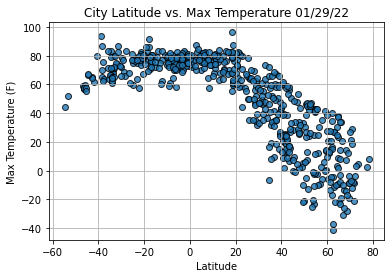

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

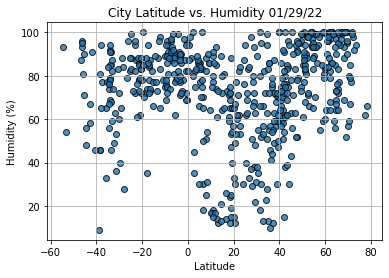

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig2.png")
# Show plot.
plt.show()

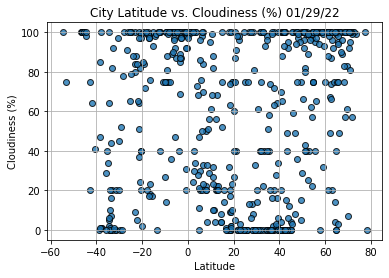

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig3.png")
# Show plot.
plt.show()

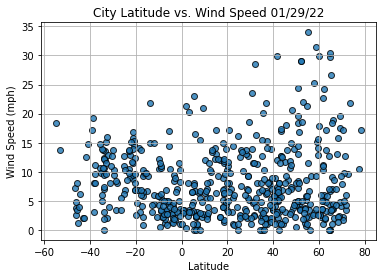

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

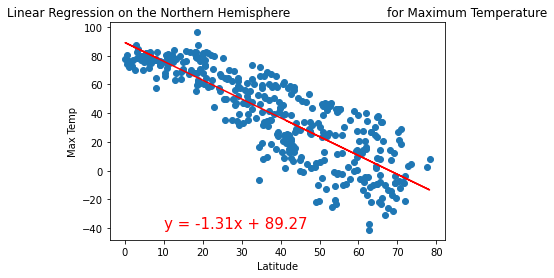

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

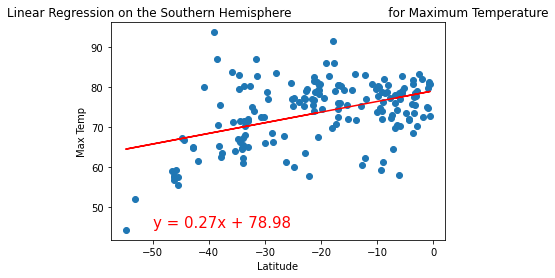

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,45))

In [ ]:
# pick up at 6.4.3